In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\coding\CEPP_Model\CEPP\Process\convert_json_data.csv")
# df = df.iloc[:900_000].copy()
df.info()
df = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314950 entries, 0 to 314949
Columns: 122 entries, backers_count to goal_minus_prior_cat_country_mon
dtypes: bool(3), float64(57), int64(41), object(21)
memory usage: 286.8+ MB



=== Avg pledge per backer (first 10) ===
                                                name  \
0                         Icons for your iPhone apps   
1                         Icons for your iPhone apps   
2                                      365 Postcards   
3                                      365 Postcards   
4                 Fruit Slinger: From farm to market   
5     Kind of Bloop: An 8-Bit Tribute to Miles Davis   
6                          Zombie Defense iPhone App   
7                          Zombie Defense iPhone App   
8                          Zombie Defense iPhone App   
9  We Operate Best Together: Mapping the Stories ...   

                category_group  pledged  backers_count  avg_pledge_per_backer  
0        Technology & Software  1820.00             98              18.571429  
1        Technology & Software  1820.00             98              18.571429  
2                 Art & Design   626.00             54              11.592593  
3                 Art

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\244364068.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_valid.groupby("backer_bin")["state"]


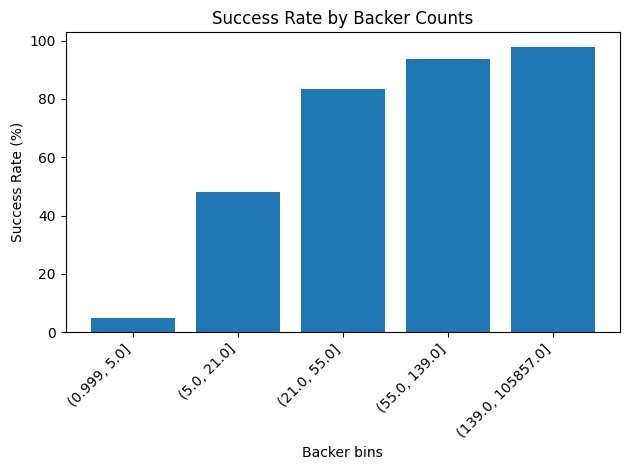


=== Avg pledge per backer by category ===
                category_group  avg_pledge_per_backer
0          Fashion & Wearables             682.319652
1        Technology & Software             623.323903
2                 Art & Design             431.752725
3        Film, Video & Theater             242.722499
4                 Games & Toys             199.325914
5       Nature & Miscellaneous             188.884476
6                        Music             181.908331
7                 Food & Drink             174.687071
8    Community & Social Impact             148.033369
9  Books, Writing & Publishing             102.910775


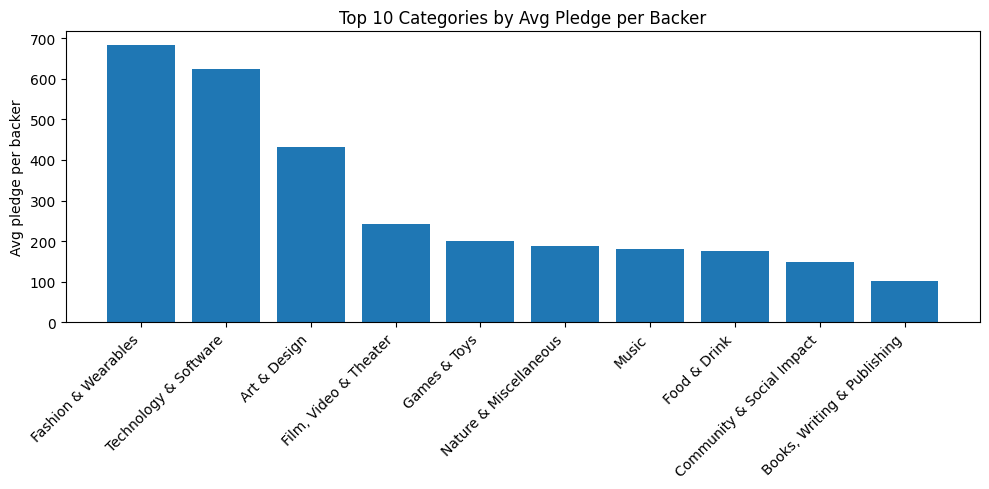

In [3]:

# 1) Avg pledge per backer
df["avg_pledge_per_backer"] = df.apply(
    lambda r: r["pledged"]/r["backers_count"] if r["backers_count"]>0 else np.nan, axis=1
)
print("\n=== Avg pledge per backer (first 10) ===")
print(df[["name","category_group","pledged","backers_count","avg_pledge_per_backer"]].head(10))

# 2) Correlation backers vs pledged
corr_val = df[["backers_count","pledged"]].corr().iloc[0,1]
print(f"\nCorrelation between backers_count and pledged: {corr_val:.3f}")

# 3) Success rate by backer bins
df_valid = df[df["backers_count"]>0].copy()
df_valid["backer_bin"] = pd.qcut(df_valid["backers_count"], 5, duplicates="drop")
backer_success = (
    df_valid.groupby("backer_bin")["state"]
        .apply(lambda s: (s==1).mean()*100)
        .reset_index()
        .rename(columns={"state":"success_rate_%"})
)
print("\n=== Success rate by backer bins ===")
print(backer_success)

plt.figure()
plt.bar(backer_success["backer_bin"].astype(str), backer_success["success_rate_%"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Success Rate (%)")
plt.xlabel("Backer bins")
plt.title("Success Rate by Backer Counts")
plt.tight_layout()
plt.show()

# 4) Avg pledge per backer by category
avg_per_cat = (
    df_valid.groupby("category_group")["avg_pledge_per_backer"]
        .mean().sort_values(ascending=False)
        .reset_index()
)
print("\n=== Avg pledge per backer by category ===")
print(avg_per_cat.head(15))

plt.figure(figsize=(10,5))
plt.bar(avg_per_cat.head(10)["category_group"], avg_per_cat.head(10)["avg_pledge_per_backer"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Avg pledge per backer")
plt.title("Top 10 Categories by Avg Pledge per Backer")
plt.tight_layout()
plt.show()



=== State Distribution (%) ===
   state    percent
0      1  61.341483
1      0  38.658517

=== Success Rate by Category (%) ===
                category_group  success_rate_%
0                        Music       72.779806
1  Books, Writing & Publishing       71.649468
2        Film, Video & Theater       69.922210
3                 Art & Design       66.645499
4          Fashion & Wearables       66.134307
5                 Games & Toys       63.438641
6       Nature & Miscellaneous       61.679632
7        Technology & Software       56.989998
8                 Food & Drink       42.444833
9    Community & Social Impact       41.730433

=== Staff Pick vs Success (%) ===
      staff_bool  success_rate_%
0  no_staff_pick       55.766298
1     staff_pick       92.260210

=== Spotlight vs Success (%) ===
      spot_bool  success_rate_%
0  no_spotlight             0.0
1     spotlight           100.0

=== Video vs Success (%) ===
   has_video  success_rate_%
0   no_video       49.417012
1

C:\Users\USER\AppData\Local\Temp\ipykernel_9396\1747255575.py:145: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_goal.groupby("goal_bin")["state"]



=== Success rate by goal bins (quantiles) ===
                         goal_bin  success_rate_%
0  (0.009000000000000001, 1000.0]       76.739778
1                (1000.0, 3500.0]       67.881632
2                (3500.0, 8000.0]       63.097505
3               (8000.0, 20000.0]       57.473438
4         (20000.0, 1000000000.0]       39.376718

=== Success rate by launch month ===
    launch_ym  success_rate_%
172   2023-08       67.672791
173   2023-09       70.454545
174   2023-10       73.940058
175   2023-11       70.685053
176   2023-12       66.004673
177   2024-01       72.746145
178   2024-02       74.567568
179   2024-03       75.261064
180   2024-04       73.902439
181   2024-05       74.659522
182   2024-06       74.299176
183   2024-07       74.778661
184   2024-08       74.066485
185   2024-09       78.988026
186   2024-10       79.264157
187   2024-11       74.232117
188   2024-12       71.179183
189   2025-01       75.734355
190   2025-02       78.375286
191   2025-03  

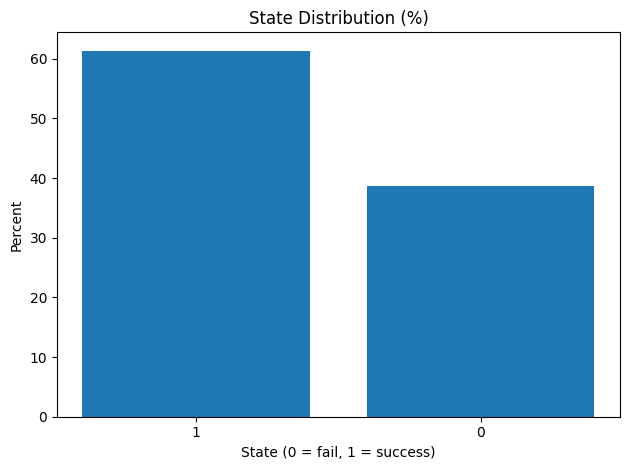

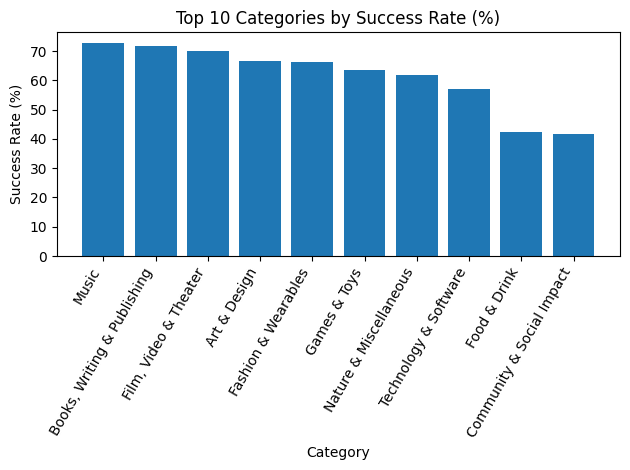

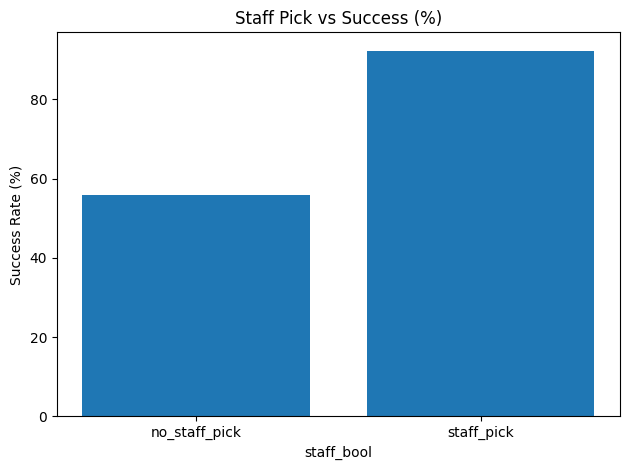

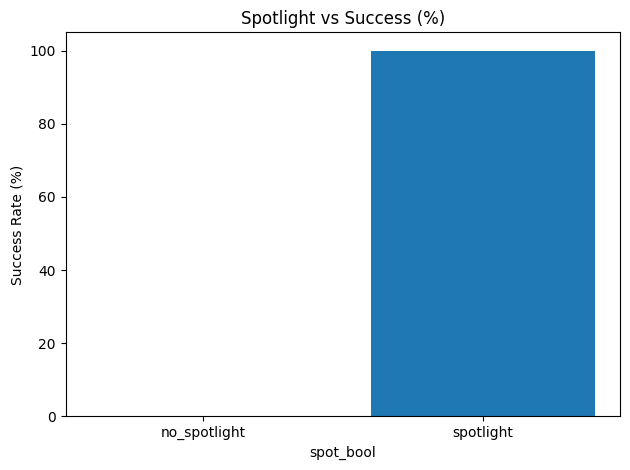

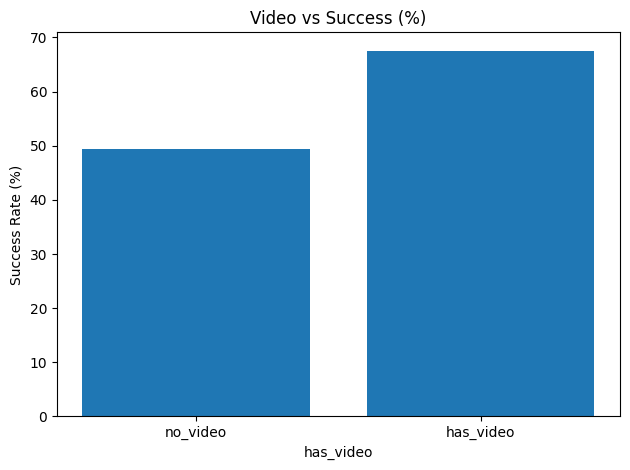

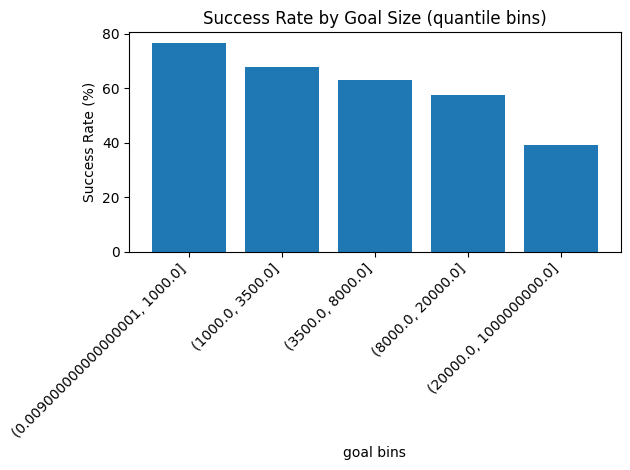

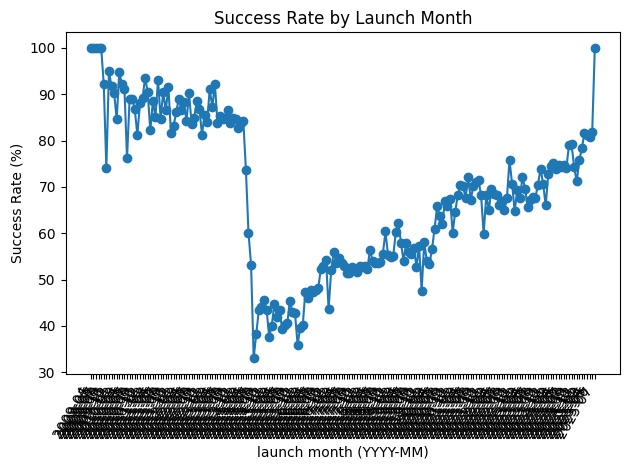


[SUMMARY]
Rows: 314,950
Overall success rate: 61.34%
Top categories by success rate:
                category_group  success_rate_%
0                        Music       72.779806
1  Books, Writing & Publishing       71.649468
2        Film, Video & Theater       69.922210
3                 Art & Design       66.645499
4          Fashion & Wearables       66.134307
5                 Games & Toys       63.438641
6       Nature & Miscellaneous       61.679632
7        Technology & Software       56.989998
8                 Food & Drink       42.444833
9    Community & Social Impact       41.730433


In [6]:
# -*- coding: utf-8 -*-
# Insight เทียบกับ "success state" — กำหนดชัดเจน: state = 1 (success), 0 (fail)

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import unquote

# -------------------- CONFIG --------------------
FILE_PATH = "D:\coding\CEPP_Model\CEPP\Process\convert_json_data.csv"   # เปลี่ยนได้
TOPK_CAT  = 10
OVERFUNDED_THRESHOLD = 200
# ------------------------------------------------

assert os.path.exists(FILE_PATH), f"ไม่พบไฟล์: {FILE_PATH}"
df = pd.read_csv(FILE_PATH)

# -------------------- PREP --------------------
# 1) category_group จาก source_url (fallback ไปที่ category ถ้าไม่มี)
cat_re = re.compile(r"/([^/]+)/?$")
def get_category(url: str) -> str:
    if not isinstance(url, str) or not url: return "unknown"
    m = cat_re.search(url)
    return unquote(m.group(1).strip()) if m else "unknown"

if "source_url" in df.columns:
    df["category_group"] = df["source_url"].map(get_category)
elif "category_group" in df.columns:
    df["category_group"] = df["category_group"].astype(str).fillna("unknown")
else:
    df["category_group"] = "unknown"

# 2) has_video
df["has_video"] = df.get("video", pd.Series(index=df.index)).notna()

# 3) staff_pick / spotlight → booleans
def to_bool(x):
    if pd.isna(x): return False
    if isinstance(x, (bool, np.bool_)): return bool(x)
    s = str(x).strip().lower()
    if s in {"true","1","yes","y","t"}: return True
    if s in {"false","0","no","n","f",""}: return False
    return False

df["staff_bool"] = df.get("staff_pick", False).map(to_bool) if "staff_pick" in df.columns else False
df["spot_bool"]  = df.get("spotlight",  False).map(to_bool) if "spotlight"  in df.columns else False

# 4) numeric safe
for col in ["percent_funded","pledged","usd_pledged","goal"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# -------------------- TARGET: state ∈ {0,1} --------------------
if "state" not in df.columns:
    raise ValueError("ไม่พบคอลัมน์ 'state'")

# บังคับเป็นตัวเลข และตรวจว่ามีแค่ 0/1
df["state"] = pd.to_numeric(df["state"], errors="coerce").fillna(-1).astype(int)
uniq = set(df["state"].unique())
if not uniq.issubset({0,1}):
    bad = sorted(uniq - {0,1})
    raise ValueError(f"'state' ต้องเป็น 0/1 เท่านั้น (พบค่าที่ไม่ใช่ 0/1: {bad[:10]} ...)")

is_success = (df["state"] == 1)

# -------------------- 1) STATE DISTRIBUTION --------------------
state_dist = (
    df["state"].value_counts(normalize=True, dropna=False)
    .mul(100).sort_values(ascending=False)
    .rename("percent").reset_index().rename(columns={"index":"state"})
)
print("\n=== State Distribution (%) ===")
print(state_dist)

# -------------------- 2) SUCCESS RATE BY CATEGORY --------------------
def success_rate(s: pd.Series) -> float:
    return (s == 1).mean() * 100

cat_success = (
    df.groupby("category_group", dropna=False)["state"]
      .apply(success_rate)
      .sort_values(ascending=False)
      .rename("success_rate_%").reset_index()
)
cat_top = cat_success.head(TOPK_CAT)

print("\n=== Success Rate by Category (%) ===")
print(cat_success.head(50))

# -------------------- 3) STAFF / SPOTLIGHT / VIDEO vs SUCCESS --------------------
staff_success = (
    df.groupby("staff_bool")["state"].apply(success_rate)
      .rename("success_rate_%").reset_index()
      .replace({True:"staff_pick", False:"no_staff_pick"})
)
spot_success = (
    df.groupby("spot_bool")["state"].apply(success_rate)
      .rename("success_rate_%").reset_index()
      .replace({True:"spotlight", False:"no_spotlight"})
)
video_success = (
    df.groupby("has_video")["state"].apply(success_rate)
      .rename("success_rate_%").reset_index()
      .replace({True:"has_video", False:"no_video"})
)

print("\n=== Staff Pick vs Success (%) ===")
print(staff_success)

print("\n=== Spotlight vs Success (%) ===")
print(spot_success)

print("\n=== Video vs Success (%) ===")
print(video_success)

# -------------------- 4) OVERFUNDED PROJECTS --------------------
if "percent_funded" in df.columns:
    overfunded = df[df["percent_funded"] > OVERFUNDED_THRESHOLD].copy()
    cols_show = [c for c in ["name","category_group","percent_funded","usd_pledged","pledged","currency","country"] if c in overfunded.columns]
    print(f"\n=== Top Overfunded Projects (percent_funded > {OVERFUNDED_THRESHOLD}) ===")
    if not overfunded.empty and cols_show:
        print(overfunded[cols_show].sort_values("percent_funded", ascending=False).head(20))
    else:
        print("(no rows)")

# -------------------- 5) AVG PLEDGED BY CATEGORY (USD) --------------------
if "usd_pledged" in df.columns:
    avg_pledged = (
        df.groupby("category_group")["usd_pledged"]
          .mean().sort_values(ascending=False).rename("avg_usd_pledged")
          .reset_index()
    )
    print("\n=== Avg USD Pledged by Category ===")
    print(avg_pledged.head(20))

# -------------------- 6) SUCCESS vs GOAL SIZE (QUANTILE BINS) --------------------
success_by_goal = pd.DataFrame()
if "goal" in df.columns and df["goal"].notna().any():
    m = df["goal"] > 0
    df_goal = df[m].copy()
    try:
        df_goal["goal_bin"] = pd.qcut(df_goal["goal"], 5, duplicates="drop")
        success_by_goal = (
            df_goal.groupby("goal_bin")["state"]
                   .apply(success_rate)
                   .rename("success_rate_%")
                   .reset_index()
        )
        print("\n=== Success rate by goal bins (quantiles) ===")
        print(success_by_goal)
    except Exception as e:
        print("\n[WARN] Cannot create goal quantile bins:", e)

# -------------------- 7) TIME TREND --------------------
time_trend = pd.DataFrame()
def parse_maybe_epoch_or_iso(s: pd.Series) -> pd.Series:
    epoch_parsed = pd.to_datetime(pd.to_numeric(s, errors="coerce"), unit="s", errors="coerce")
    if epoch_parsed.isna().mean() > 0.9:
        return pd.to_datetime(s, errors="coerce")
    return epoch_parsed

time_col = next((c for c in ["launched_at","created_at","launch_date","start_time"] if c in df.columns), None)
if time_col:
    launched = parse_maybe_epoch_or_iso(df[time_col])
    df["launched_dt"] = launched
    if df["launched_dt"].notna().any():
        df["launch_ym"] = df["launched_dt"].dt.to_period("M").astype(str)
        time_trend = (
            df.dropna(subset=["launch_ym"])
              .groupby("launch_ym")["state"]
              .apply(success_rate)
              .rename("success_rate_%")
              .reset_index()
              .sort_values("launch_ym")
        )
        print("\n=== Success rate by launch month ===")
        print(time_trend.tail(24))
else:
    print("\n[INFO] ไม่พบคอลัมน์เวลา — ข้าม time trend")

# -------------------- PLOTS --------------------
if not state_dist.empty:
    plt.figure()
    plt.bar(state_dist["state"].astype(str), state_dist["percent"])
    plt.title("State Distribution (%)")
    plt.xlabel("State (0 = fail, 1 = success)")
    plt.ylabel("Percent")
    plt.tight_layout()
    plt.show()

if not cat_top.empty:
    plt.figure()
    plt.bar(cat_top["category_group"].astype(str), cat_top["success_rate_%"])
    plt.title(f"Top {TOPK_CAT} Categories by Success Rate (%)")
    plt.xlabel("Category")
    plt.ylabel("Success Rate (%)")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()

if not staff_success.empty:
    plt.figure()
    plt.bar(staff_success.iloc[:,0].astype(str), staff_success["success_rate_%"])
    plt.title("Staff Pick vs Success (%)")
    plt.xlabel(staff_success.columns[0])
    plt.ylabel("Success Rate (%)")
    plt.tight_layout()
    plt.show()

if not spot_success.empty:
    plt.figure()
    plt.bar(spot_success.iloc[:,0].astype(str), spot_success["success_rate_%"])
    plt.title("Spotlight vs Success (%)")
    plt.xlabel(spot_success.columns[0])
    plt.ylabel("Success Rate (%)")
    plt.tight_layout()
    plt.show()

if not video_success.empty:
    plt.figure()
    plt.bar(video_success.iloc[:,0].astype(str), video_success["success_rate_%"])
    plt.title("Video vs Success (%)")
    plt.xlabel(video_success.columns[0])
    plt.ylabel("Success Rate (%)")
    plt.tight_layout()
    plt.show()

if not success_by_goal.empty:
    plt.figure()
    plt.bar(success_by_goal["goal_bin"].astype(str), success_by_goal["success_rate_%"])
    plt.title("Success Rate by Goal Size (quantile bins)")
    plt.xlabel("goal bins")
    plt.ylabel("Success Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if not time_trend.empty:
    plt.figure()
    plt.plot(time_trend["launch_ym"], time_trend["success_rate_%"], marker="o")
    plt.title("Success Rate by Launch Month")
    plt.xlabel("launch month (YYYY-MM)")
    plt.ylabel("Success Rate (%)")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()

# -------------------- SUMMARY --------------------
print("\n[SUMMARY]")
print(f"Rows: {len(df):,}")
print(f"Overall success rate: {df['state'].mean()*100:.2f}%")
print("Top categories by success rate:")
print(cat_success.head(10))


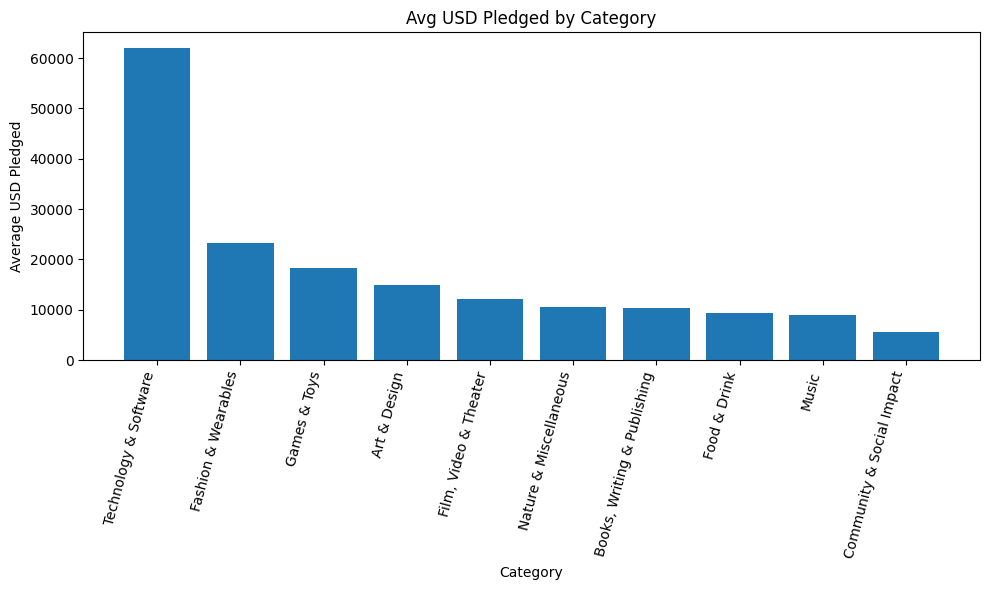

In [7]:
if "avg_pledged" in locals() and not avg_pledged.empty:
    plt.figure(figsize=(10,6))
    plt.bar(avg_pledged["category_group"].astype(str), avg_pledged["avg_usd_pledged"])
    plt.title("Avg USD Pledged by Category")
    plt.xlabel("Category")
    plt.ylabel("Average USD Pledged")
    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()
    plt.show()

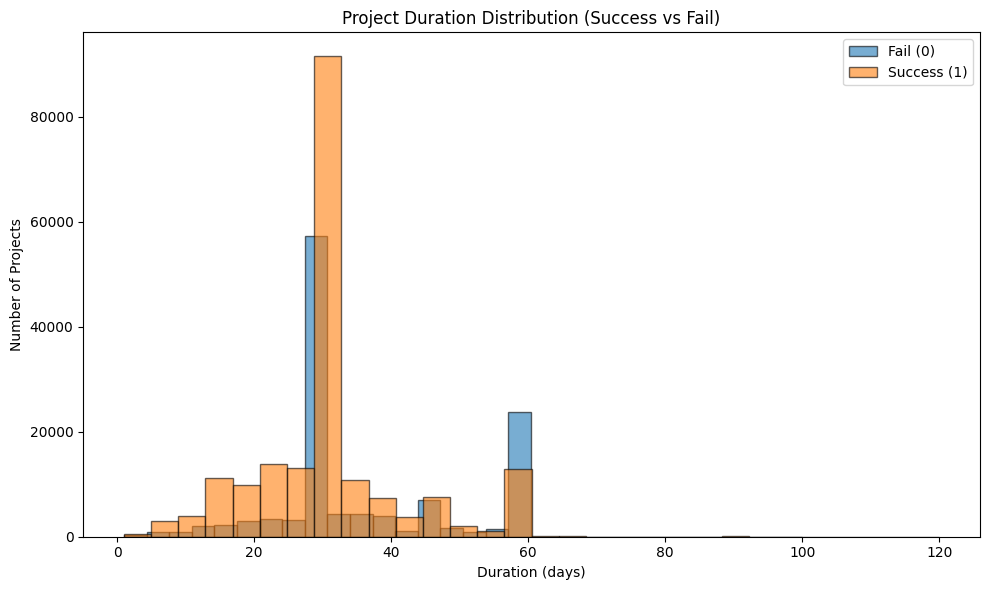

In [10]:
import matplotlib.pyplot as plt

if "launched_at" in df.columns and ("deadline" in df.columns or "end_time" in df.columns):
    launched = pd.to_datetime(pd.to_numeric(df["launched_at"], errors="coerce"), unit="s", errors="coerce")
    if launched.isna().mean() > 0.9:
        launched = pd.to_datetime(df["launched_at"], errors="coerce")
    df["launched_dt"] = launched

    deadline_col = "deadline" if "deadline" in df.columns else "end_time"
    deadline = pd.to_datetime(pd.to_numeric(df[deadline_col], errors="coerce"), unit="s", errors="coerce")
    if deadline.isna().mean() > 0.9:
        deadline = pd.to_datetime(df[deadline_col], errors="coerce")
    df["deadline_dt"] = deadline

    # duration (days)
    df["duration_days"] = (df["deadline_dt"] - df["launched_dt"]).dt.days

    # แยก success/fail
    dur_success = df.loc[df["state"]==1, "duration_days"].dropna()
    dur_fail    = df.loc[df["state"]==0, "duration_days"].dropna()

    # Overlay histogram (โปร่งใส)
    plt.figure(figsize=(10,6))
    plt.hist(dur_fail, bins=30, alpha=0.6, label="Fail (0)", edgecolor="black")
    plt.hist(dur_success, bins=30, alpha=0.6, label="Success (1)", edgecolor="black")
    plt.title("Project Duration Distribution (Success vs Fail)")
    plt.xlabel("Duration (days)")
    plt.ylabel("Number of Projects")
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("[INFO] Dataset ไม่มี launched_at + deadline/end_time เลยคำนวณ duration ไม่ได้")



=== Success Rate by Day of Week ===
  launch_dow  success_rate_%
0     Friday       59.512954
1     Monday       59.812975
2   Saturday       57.475834
3     Sunday       55.831125
4   Thursday       60.493281
5    Tuesday       67.599932
6  Wednesday       60.864826


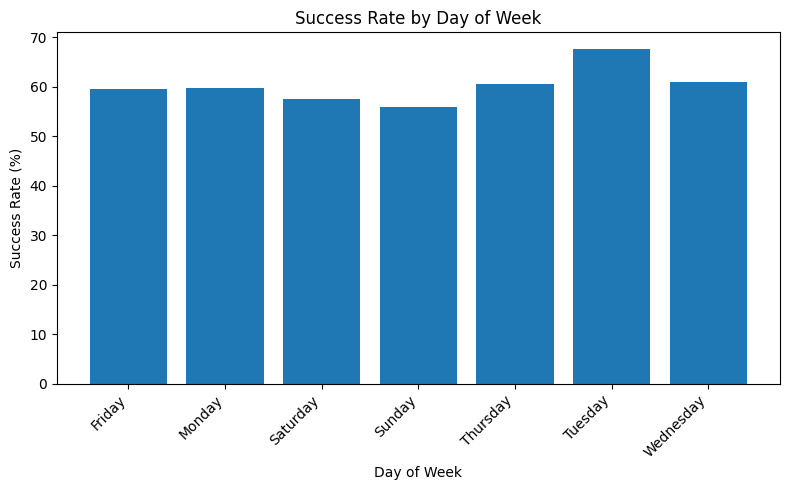

In [12]:
if "launched_dt" in df.columns and df["launched_dt"].notna().any():
    df["launch_dow"] = df["launched_dt"].dt.day_name()

    dow_success = (
        df.groupby("launch_dow")["state"]
          .apply(lambda s: (s == 1).mean() * 100)
          .rename("success_rate_%")
          .reset_index()
    )

    print("\n=== Success Rate by Day of Week ===")
    print(dow_success)

    plt.figure(figsize=(8,5))
    plt.bar(dow_success["launch_dow"], dow_success["success_rate_%"])
    plt.title("Success Rate by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Success Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



=== Success Rate by Pledged Bin ===
             pledged_bin  success_rate_%
0         (-0.001, 83.0]        1.839537
1         (83.0, 1025.0]       39.470052
2     (1025.0, 3733.171]       78.931062
3    (3733.171, 11726.0]       90.101761
4  (11726.0, 46762258.0]       96.405665


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\2407446372.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pledged_bin")["state"]


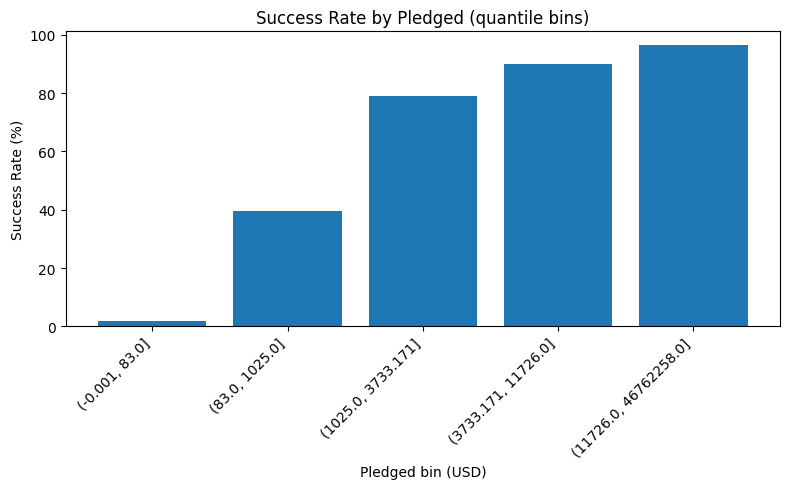

In [15]:
if "usd_pledged" in df.columns:
    df["pledged_bin"] = pd.qcut(df["usd_pledged"], q=5, duplicates="drop")
    pledge_success = (
        df.groupby("pledged_bin")["state"]
          .apply(lambda s: (s==1).mean()*100)
          .reset_index()
          .rename(columns={"state":"success_rate_%"})
    )

    print("\n=== Success Rate by Pledged Bin ===")
    print(pledge_success)

    plt.figure(figsize=(8,5))
    plt.bar(pledge_success["pledged_bin"].astype(str), pledge_success["success_rate_%"])
    plt.title("Success Rate by Pledged (quantile bins)")
    plt.xlabel("Pledged bin (USD)")
    plt.ylabel("Success Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\60090043.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("duration_bin")["usd_pledged"]



=== Avg USD Pledged by Duration Bin ===
    duration_bin  avg_usd_pledged
0  (0.999, 27.0]      9376.791769
1   (27.0, 30.0]     15494.198437
2   (30.0, 41.0]     27191.551548
3  (41.0, 120.0]     24373.371189


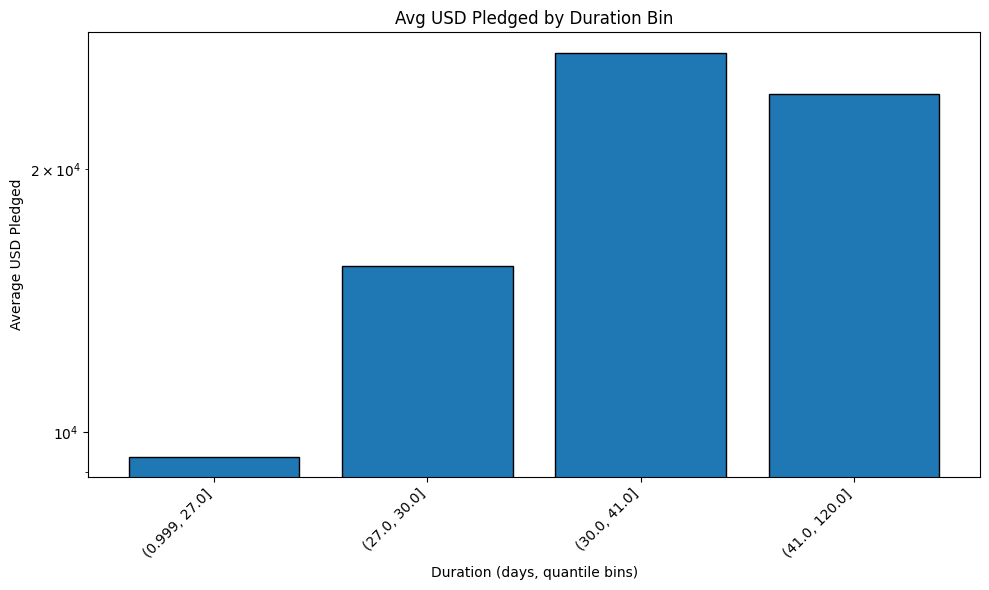

In [20]:
import matplotlib.pyplot as plt

if "duration_days" in df.columns and "usd_pledged" in df.columns:
    # แบ่ง duration เป็น quantile bins
    df["duration_bin"] = pd.qcut(df["duration_days"], q=5, duplicates="drop")

    dur_pledge = (
        df.groupby("duration_bin")["usd_pledged"]
          .mean()
          .reset_index(name="avg_usd_pledged")
    )

    print("\n=== Avg USD Pledged by Duration Bin ===")
    print(dur_pledge)

    # กราฟแท่ง
    plt.figure(figsize=(10,6))
    plt.bar(dur_pledge["duration_bin"].astype(str), dur_pledge["avg_usd_pledged"], 
             edgecolor="black")
    plt.title("Avg USD Pledged by Duration Bin")
    plt.xlabel("Duration (days, quantile bins)")
    plt.ylabel("Average USD Pledged")
    plt.yscale("log")  # ใช้ log scale กัน outlier
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
